In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import datetime
%matplotlib inline
import matplotlib.pyplot as plt
import seaborn as sb


In [23]:
Data = pd.read_excel('Mutual_Funds_Sht_list20.xlsx')
Data.reset_index(drop=True, inplace=True)
Data=pd.DataFrame(Data)
datetime_series = pd.to_datetime(Data['Date'])
datetime_index = pd.DatetimeIndex(datetime_series.values)
Data=Data.set_index(datetime_index)
Data.drop('Date',axis=1,inplace=True)
Data.head()

,PFGDAAU LX Equity,PFTEAAU LX Equity,PFCSAAU LX Equity,PFARAAU LX Equity,PFBKAAU LX Equity,PFGOAAU LX Equity,AIBALMA AB Equity,LODFUIA LX Equity,CCASORI MK Equity,CCASLTF MK Equity,...,GMFDEBI LE Equity,PGPGIFA ID Equity,BLUESPH BM Equity,PFGLAAU LX Equity,ALPCRDA LX Equity,ALCONGP AB Equity,UBSFLBI LX Equity,BUTIBLI KY Equity,PGPCBFA ID Equity,SCHGTRA LX Equity
2020-01-05,125.93,132.19,126.97,144.87,102.16,116.12,16.6996,112.33,2.5811,3.3174,...,107.58,1.203,1087.01,114.97,116.80,1.5310,146.87,30.00,1.804,108.6293
2020-02-10,134.85,139.35,133.97,156.04,109.34,126.30,18.8113,113.03,2.6935,3.4563,...,108.22,1.241,1119.46,121.95,126.94,1.5832,149.48,32.92,2.144,115.9955
2020-03-07,130.43,137.07,130.64,153.08,105.99,121.57,17.9337,112.74,2.6358,3.3829,...,107.91,1.245,1104.38,118.62,122.53,1.5561,148.49,31.42,2.000,113.6533
2020-04-09,134.93,139.17,134.16,155.57,109.93,126.33,18.8800,112.75,2.6902,3.4602,...,108.10,1.248,1133.37,123.29,126.51,1.5940,149.58,33.77,2.184,116.8561
2020-04-12,141.42,141.48,136.97,157.10,110.60,128.34,19.3108,113.56,2.7389,3.5184,...,108.56,1.280,1158.10,124.23,130.59,1.6234,151.01,34.69,2.425,122.0731


In [24]:
# Log of percentage change of all stocks in the list
Ret= Data.pct_change().apply(lambda x: np.log(1+x)) # CONVERT TO RETURN
Ret.head()

,PFGDAAU LX Equity,PFTEAAU LX Equity,PFCSAAU LX Equity,PFARAAU LX Equity,PFBKAAU LX Equity,PFGOAAU LX Equity,AIBALMA AB Equity,LODFUIA LX Equity,CCASORI MK Equity,CCASLTF MK Equity,...,GMFDEBI LE Equity,PGPGIFA ID Equity,BLUESPH BM Equity,PFGLAAU LX Equity,ALPCRDA LX Equity,ALCONGP AB Equity,UBSFLBI LX Equity,BUTIBLI KY Equity,PGPCBFA ID Equity,SCHGTRA LX Equity
2020-01-05,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2020-02-10,0.068437,0.052748,0.053665,0.074276,0.067922,0.084036,0.119073,0.006212,0.042626,0.041017,...,0.005931,0.031099,0.029416,0.058940,0.083251,0.033527,0.017615,0.092883,0.172667,0.065610
2020-03-07,-0.033326,-0.016497,-0.025170,-0.019152,-0.031118,-0.038170,-0.047776,-0.002569,-0.021655,-0.021465,...,-0.002869,0.003218,-0.013562,-0.027686,-0.035359,-0.017265,-0.006645,-0.046636,-0.069526,-0.020399
2020-04-09,0.033919,0.015204,0.026588,0.016135,0.036499,0.038407,0.051422,0.000089,0.020429,0.022593,...,0.001759,0.002407,0.025911,0.038614,0.031965,0.024064,0.007314,0.072128,0.088011,0.027791
2020-04-12,0.046978,0.016462,0.020729,0.009787,0.006076,0.015785,0.022561,0.007158,0.017941,0.016680,...,0.004246,0.025318,0.021585,0.007595,0.031741,0.018276,0.009515,0.026879,0.104673,0.043677


In [25]:
Ann_Ret = Ret.mean()*52
#print (Ann_Ret)

In [26]:
Ann_Risk=Ret.std()*(52)**(0.5)
#print(Ann_Risk)

In [27]:
Ret_Corr = Ret.corr()
#(Ret_Corr)


Ret_Covar = Ret.cov()
#print(Ret_Covar)


# Yearly returns for individual companies
ind_er = Data.resample('Y').last().pct_change().mean()
#ind_er

In [28]:
Data.columns


Index(['PFGDAAU LX Equity', 'PFTEAAU LX Equity', 'PFCSAAU LX Equity',
       'PFARAAU LX Equity', 'PFBKAAU LX Equity', 'PFGOAAU LX Equity',
       'AIBALMA AB Equity', 'LODFUIA LX Equity', 'CCASORI MK Equity',
       'CCASLTF MK Equity', 'BBFTOP3 KY Equity', 'CRLCBUU LX Equity',
       'BCUSDLF KK Equity', 'GMFDEBI LE Equity', 'PGPGIFA ID Equity',
       'BLUESPH BM Equity', 'PFGLAAU LX Equity', 'ALPCRDA LX Equity',
       'ALCONGP AB Equity', 'UBSFLBI LX Equity', 'BUTIBLI KY Equity',
       'PGPCBFA ID Equity', 'SCHGTRA LX Equity'],
      dtype='object')

In [29]:
Ret_risk=(Ann_Ret/Ann_Risk)
print(Ret_risk)

PFGDAAU LX Equity    0.413327
PFTEAAU LX Equity    0.418412
PFCSAAU LX Equity    0.414613
PFARAAU LX Equity    0.456943
PFBKAAU LX Equity    0.408766
PFGOAAU LX Equity    0.609806
AIBALMA AB Equity    0.466669
LODFUIA LX Equity    0.427200
CCASORI MK Equity    0.558631
CCASLTF MK Equity    0.531841
BBFTOP3 KY Equity    0.428907
CRLCBUU LX Equity    0.433678
BCUSDLF KK Equity    0.466005
GMFDEBI LE Equity    0.423722
PGPGIFA ID Equity    0.471328
BLUESPH BM Equity    0.412956
PFGLAAU LX Equity    0.468579
ALPCRDA LX Equity    0.464154
ALCONGP AB Equity    0.373771
UBSFLBI LX Equity    0.344625
BUTIBLI KY Equity    0.449708
PGPCBFA ID Equity    0.324204
SCHGTRA LX Equity    0.432449
dtype: float64


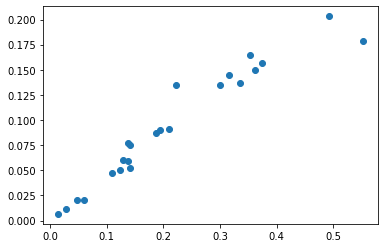

In [30]:
x=Ann_Risk
y=Ann_Ret
plt.scatter(x,y)
plt.show()

In [31]:
assets = pd.concat([Ann_Ret,Ann_Risk,Ret_risk], axis=1)
assets.columns = ['Ann Returns', 'Ann Risk', 'Return Risk Ratio']
assets

,Ann Returns,Ann Risk,Return Risk Ratio
PFGDAAU LX Equity,0.203267,0.491782,0.413327
PFTEAAU LX Equity,0.156463,0.373945,0.418412
PFCSAAU LX Equity,0.149839,0.361394,0.414613
PFARAAU LX Equity,0.144333,0.315867,0.456943
PFBKAAU LX Equity,0.136817,0.334707,0.408766
PFGOAAU LX Equity,0.134963,0.221321,0.609806
AIBALMA AB Equity,0.164977,0.353521,0.466669
LODFUIA LX Equity,0.020281,0.047473,0.427200
CCASORI MK Equity,0.076950,0.137748,0.558631
CCASLTF MK Equity,0.074905,0.140841,0.531841


<AxesSubplot:>

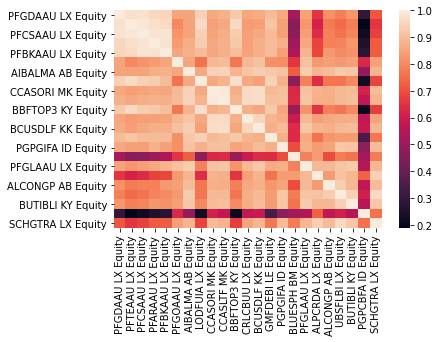

In [32]:
sb.heatmap(Ret_Corr)

In [33]:
w = {'PFGDAAU LX Equity':0.043, 'PFTEAAU LX Equity':0.043, 'PFCSAAU LX Equity':0.043, 'PFARAAU LX Equity':0.043, 'PFBKAAU LX Equity':0.043, 'PFGOAAU LX Equity':0.043, 'AIBALMA AB Equity':0.043, 'LODFUIA LX Equity':0.043, 'CCASORI MK Equity':0.043, 'CCASLTF MK Equity':0.043, 'BBFTOP3 KY Equity':0.043, 'CRLCBUU LX Equity':0.043, 'BCUSDLF KK Equity':0.043, 'GMFDEBI LE Equity':0.043,'PGPGIFA ID Equity':0.043, 'BLUESPH BM Equity':0.043, 'PFGLAAU LX Equity':0.043, 'ALPCRDA LX Equity':0.043, 'ALCONGP AB Equity':0.043, 'UBSFLBI LX Equity':0.043, 'BUTIBLI KY Equity':0.043, 'PGPCBFA ID Equity':0.043, 'SCHGTRA LX Equity':0.043} 
port_var = Ret_Covar.mul(w, axis=0).mul(w, axis=1).sum().sum()
Ann_port_std = (port_var*52)**(0.5)
print (port_var)
print (port_var*52)

0.0006778032013243736
0.03524576646886742


In [34]:
Ann_port_std

0.18773855882281462

In [35]:
w = [0.043,0.043,0.043, 0.043,0.043,0.043,0.043,0.043,0.043,0.043,0.043,0.043,0.043,0.043,0.043,0.043,0.043,0.043,0.043,0.043,0.043,0.043,0.043]
port_er = (w*Ann_Ret).sum()
port_er

0.0926156052474627

In [36]:
p_ret = [] # Define an empty array for portfolio returns
p_vol = [] # Define an empty array for portfolio volatility
p_weights = [] # Define an empty array for asset weights

num_assets = len(Data.columns)
num_portfolios = 5000

In [37]:
for portfolio in range(num_portfolios):
    weights = np.random.random(num_assets)
    weights = weights/np.sum(weights)
    p_weights.append(weights)
    returns = np.dot(weights,Ann_Ret) 
    p_ret.append(returns)
    var = Ret_Covar.mul(weights, axis=0).mul(weights, axis=1).sum().sum() # Portfolio Variance
    sd = np.sqrt(var) #Daily standard deviation
    ann_sd = sd*np.sqrt(52) #Annual standard deviation = volatility
    p_vol.append(ann_sd)

In [38]:
data = {'Returns':p_ret, 'Risk':p_vol}
for counter, symbol in enumerate(Data.columns.tolist()):
#print(counter, symbol)
    data[symbol+' weight'] = [w[counter] for w in p_weights]
portfolios = pd.DataFrame(data)
portfolios.head() # Dataframe of the 10000 portfolios created

,Returns,Risk,PFGDAAU LX Equity weight,PFTEAAU LX Equity weight,PFCSAAU LX Equity weight,PFARAAU LX Equity weight,PFBKAAU LX Equity weight,PFGOAAU LX Equity weight,AIBALMA AB Equity weight,LODFUIA LX Equity weight,...,GMFDEBI LE Equity weight,PGPGIFA ID Equity weight,BLUESPH BM Equity weight,PFGLAAU LX Equity weight,ALPCRDA LX Equity weight,ALCONGP AB Equity weight,UBSFLBI LX Equity weight,BUTIBLI KY Equity weight,PGPCBFA ID Equity weight,SCHGTRA LX Equity weight
0,0.087477,0.176122,0.045598,0.061544,0.005075,0.041481,0.034117,0.062220,0.004079,0.052148,...,0.042670,0.060910,0.002791,0.066885,0.067739,0.016156,0.075788,0.068111,0.033268,0.007246
1,0.090574,0.185338,0.040438,0.059910,0.039848,0.019235,0.027372,0.024427,0.022016,0.081107,...,0.020246,0.022536,0.022354,0.023864,0.058200,0.066788,0.013063,0.084244,0.042167,0.076057
2,0.084443,0.172606,0.020501,0.045046,0.023463,0.046878,0.064302,0.007077,0.012656,0.033233,...,0.049202,0.073846,0.065661,0.067842,0.032378,0.055653,0.063309,0.028748,0.053469,0.048765
3,0.092319,0.190625,0.020962,0.083887,0.051492,0.041892,0.031014,0.002898,0.087653,0.011530,...,0.080928,0.034654,0.043885,0.017903,0.074618,0.051615,0.010025,0.020616,0.019975,0.086594
4,0.101490,0.203443,0.043295,0.035471,0.004916,0.056293,0.064829,0.064700,0.056202,0.028178,...,0.036679,0.042333,0.033494,0.060571,0.059098,0.020493,0.043335,0.031877,0.073897,0.077140


<AxesSubplot:xlabel='Risk', ylabel='Returns'>

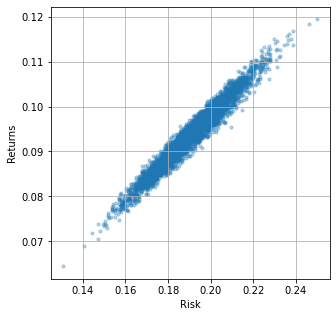

In [39]:
portfolios.plot.scatter(x='Risk', y='Returns', marker='o', s=10, alpha=0.3, grid=True, figsize=[5,5])

In [40]:
min_vol_port = portfolios.iloc[portfolios['Risk'].idxmin()]
# idxmin() gives us the minimum value in the column specified.
min_vol_port

Returns                     0.064420
Risk                        0.130832
PFGDAAU LX Equity weight    0.036098
PFTEAAU LX Equity weight    0.002129
PFCSAAU LX Equity weight    0.038192
PFARAAU LX Equity weight    0.027373
PFBKAAU LX Equity weight    0.011580
PFGOAAU LX Equity weight    0.031480
AIBALMA AB Equity weight    0.010178
LODFUIA LX Equity weight    0.089324
CCASORI MK Equity weight    0.064561
CCASLTF MK Equity weight    0.041887
BBFTOP3 KY Equity weight    0.026439
CRLCBUU LX Equity weight    0.107105
BCUSDLF KK Equity weight    0.116229
GMFDEBI LE Equity weight    0.069640
PGPGIFA ID Equity weight    0.021352
BLUESPH BM Equity weight    0.081771
PFGLAAU LX Equity weight    0.068625
ALPCRDA LX Equity weight    0.031499
ALCONGP AB Equity weight    0.072159
UBSFLBI LX Equity weight    0.034025
BUTIBLI KY Equity weight    0.006941
PGPCBFA ID Equity weight    0.007755
SCHGTRA LX Equity weight    0.003660
Name: 1075, dtype: float64

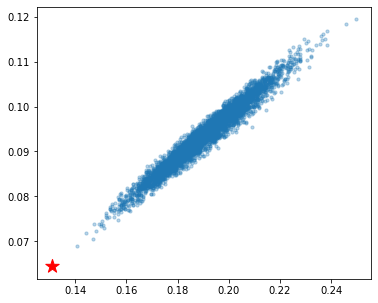

In [41]:
plt.subplots(figsize=[6,5])
plt.scatter(portfolios['Risk'], portfolios['Returns'],marker='o', s=10, alpha=0.3)
plt.scatter(min_vol_port[1], min_vol_port[0], color='r', marker='*', s=200)

In [42]:
# Finding the optimal portfolio
rf = 0.01 # risk factor
optimal_risky_port = portfolios.iloc[((portfolios['Returns']-rf)/portfolios['Risk']).idxmax()]
optimal_risky_port

Returns                     0.095571
Risk                        0.185591
PFGDAAU LX Equity weight    0.006105
PFTEAAU LX Equity weight    0.050509
PFCSAAU LX Equity weight    0.010452
PFARAAU LX Equity weight    0.079928
PFBKAAU LX Equity weight    0.005172
PFGOAAU LX Equity weight    0.079752
AIBALMA AB Equity weight    0.054573
LODFUIA LX Equity weight    0.003374
CCASORI MK Equity weight    0.034164
CCASLTF MK Equity weight    0.107100
BBFTOP3 KY Equity weight    0.068149
CRLCBUU LX Equity weight    0.003302
BCUSDLF KK Equity weight    0.010691
GMFDEBI LE Equity weight    0.038046
PGPGIFA ID Equity weight    0.110396
BLUESPH BM Equity weight    0.080678
PFGLAAU LX Equity weight    0.037617
ALPCRDA LX Equity weight    0.011088
ALCONGP AB Equity weight    0.044218
UBSFLBI LX Equity weight    0.022290
BUTIBLI KY Equity weight    0.015673
PGPCBFA ID Equity weight    0.067909
SCHGTRA LX Equity weight    0.058814
Name: 1231, dtype: float64

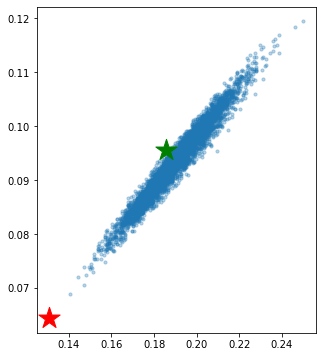

In [44]:
plt.subplots(figsize=(5, 6))
plt.scatter(portfolios['Risk'], portfolios['Returns'],marker='o', s=10, alpha=0.3)
plt.scatter(min_vol_port[1], min_vol_port[0], color='r', marker='*', s=500)
plt.scatter(optimal_risky_port[1], optimal_risky_port[0], color='g', marker='*', s=500)